<img src="cover.png">

In [3]:
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
value="Click here to toggle on/off the raw code."></form>''')

In [9]:
import IPython
from IPython.core.display import HTML
import base64
import datetime as datetime
import time
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib import cm 
import seaborn as sns
from colorama import Fore, Back, Style
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import time, scipy
from tqdm.notebook import tqdm
from tqdm import tqdm
tqdm.pandas()

# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import (train_test_split, KFold,
                                     StratifiedKFold, GridSearchCV)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import (LogisticRegression, SGDClassifier,
                                  Perceptron)
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,  
                              GradientBoostingClassifier,
                              ExtraTreesClassifier, AdaBoostClassifier,
                              BaggingClassifier)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (make_scorer, recall_score, classification_report,
                             accuracy_score,recall_score, f1_score)

# imblearn
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTETomek 
from imblearn.pipeline import Pipeline
import warnings 
warnings.filterwarnings("ignore")

# clustering
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedians import kmedians
from scipy.spatial.distance import euclidean
from sklearn.base import clone
from sklearn.decomposition import TruncatedSVD
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# nlp libraries
import re, nltk, spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from spacy.lang.en.stop_words import STOP_WORDS as en_stop
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS

# explainability
import shap
import lime
from lime.lime_text import LimeTextExplainer

from fakenewsfunctions import *

## Introduction

In 2018, over 68% of Filipinos claimed to have encountered fake news online.

We live in the digital age of information. You can now pick up your smartphone and search for anything under the sun and see other relevant topics in a matter of seconds. Question is, are you certain of the credibility of what you’re seeing? Headlines are being molded to whatever gets the most clicks and reactions while some are just downright false. Misinformation is an epidemic, a virus that spreads fake news that sway the public’s perception of reality. So how do we fight it?

Bantay Balita is a demonstration of how machine learning, as a tool, can help us distinguish the facts and explain what makes a news article credible or not. By being able to distinguish between credible and non-credible sources of information, our AI system would be able to help Filipinos - the consumers of local news information - to be more discerning of the content that they see across different social media platforms and websites. Likewise, the AI system could also be integrated among social media websites in order to be able to provide credibility scores to different sources of information that is made available on the Internet.

## Methodology

<img src="Method.png">

1. **EDA** - The team performed an EDA by calculating the PCC of the dataset then Topic Modelling by of the dataset's articles by clustering their tokenized BoW tables with the KMeans algorithm. The article tokens had stopwords removed, lemmatized, and stemmed to avoid features holding similar meanings.


2. **Resampling** - SMOTE was utilized to better represent the Positive Class (Not Credible Articles)


3. **Machine Learning Models** - Over 15 Different Machine Learning were utilized with F1 score as the chosen metric to ensure that the negative class (Credible Articles) wouldnt be wrongfully tagged as positive (Not Credible) because that would undermine the validity of our models.


4. **Model Interpretability** - SHAP and LIME were utilized to determine which particular keywords would contribute towards a Credible or Not Credible classification.

## Data

Our dataset contains over 20,000 Philippine news articles from 2016 to 2018 which were tagged as ‘credible’ or ‘not credible’ based on their source. Articles from recognized news providers such as Inquirer, Manila Bulletin, and the Manila Times were considered as credible, while articles from unofficial websites were considered as not credible. These non-credible news sources were identified and classified by bodies such as the Philippine Senate, Center for Media Freedom and Responsibility, and Catholic Bishops' Conference of the Philippines.

### A. Load Data

In [2]:
display(HTML(f'''<h3 style="text-align:center">
                Table 1: Sample Dataset
                </h3>'''))

In [8]:
df = pd.read_csv('Philippine Fake News Corpus Final.csv',encoding="ISO-8859-1",
                 usecols=[0,1,2,3,4,5,6])
df

Headline  \
0      PH ranks 2nd in Asia-Pacific in deaths due to ...   
1      Aguirre, PCSO chief deny plotting to kill âA...   
2         Duterte says charges vs ex-President will fail   
3               Group warns BFAR on law enforcement fund   
4              Solon asks Duterte for jet ski to Panatag   
...                                                  ...   
22453  Philippine Elections 2016 is not a vote for Du...   
22454     28,000 families affected by floods receive aid   
22455  Singer Jim Paredes Miffed That He Wasnât Inv...   
22456                POPE FRANCIS SCOLDS PRESIDENT OBAMA   
22457  UNITED AIRLINES WILL OFFER âECONOMY MINUSâ...   

                             Authors                       Date  \
0      ['Philippine Daily Inquirer']                        NaN   
1                   ['Jomar Canlas']  2017-04-28 20:12:54+00:00   
2         ['Christine O. AvendaÃ±o']                        NaN   
3                   ['Neil Alcober']  2017-08-12 19:54:48+00:00   
4                         ['Dj Yap']                        NaN   
...                              ...                        ...   
22453                             []  2016-04-28 05:35:44+00:00   
22454      ['Mary Gleefer F. Jalea']  2018-08-15 00:03:17+00:00   
22455                  ['Pol Pinoy']               6/16/16 0:00   
22456                  ['Pol Pinoy']               3/27/17 0:00   
22457                  ['Pol Pinoy']                1/5/18 0:00   

                                                     URL  \
0      https://newsinfo.inquirer.net/987262/ph-ranks-...   
1      https://www.manilatimes.net/aguirre-pcso-chief...   
2      https://newsinfo.inquirer.net/914727/duterte-s...   
3      https://www.manilatimes.net/group-warns-bfar-l...   
4      https://newsinfo.inquirer.net/882744/solon-ask...   
...                                                  ...   
22453  https://www.getrealphilippines.com/2016/04/phi...   
22454  https://www.manilatimes.net/28000-families-aff...   
22455  https://adobochronicles.com/2016/06/16/singer-...   
22456  https://adobochronicles.com/2014/03/27/pope-fr...   
22457  https://adobochronicles.com/2015/01/05/united-...   

                      Brand         Label  \
0                  Inquirer      Credible   
1              Manila Times      Credible   
2                  Inquirer      Credible   
3              Manila Times      Credible   
4                  Inquirer      Credible   
...                     ...           ...   
22453  Get Real Philippines  Not Credible   
22454          Manila Times      Credible   
22455      Adobo Chronicles  Not Credible   
22456      Adobo Chronicles  Not Credible   
22457      Adobo Chronicles  Not Credible   

                                                 Content  
0      Pollution Caused by Traditional Cooking Fuel I...  
1      Justice Secretary Vitaliano Aguirre 2nd And Ph...  
2      President Rodrigo Duterte on Monday Night Desc...  
3      The Militant Fisher Folk Group National Streng...  
4      Magtalo rep. Gary Alejano Is Willing To Lead T...  
...                                                  ...  
22453  Indeed, everybody is shocked â  "just shocked...  
22454  A TOTAL OF 132,259 INDIVIDUALS FROM 28,101 FAM...  
22455  Shortly After Rod Duterte Announced There Will...  
22456  President Barack Obama Met For The First Time ...  
22457  for HALF THE AIRFARE.UNITED AIRLINES (UAL) STA...  

[22458 rows x 7 columns]

### B. Data Exploration

In [4]:
df_ = df.loc[:,['Content','Label']]

In [5]:
df_.Label=df_.Label.transform(lambda x: 0 if x=='Credible' else 1)

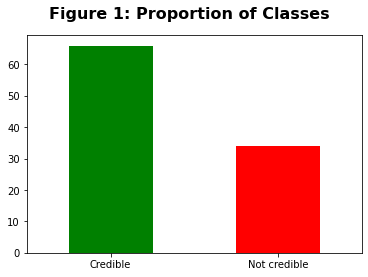

In [13]:
(df_.Label.value_counts(normalize=True)*100).plot(kind='bar', color=['green','red'])
plt.xticks([0,1],['Credible', 'Not credible'], rotation=0)
plt.suptitle('Figure 1: Proportion of Classes',
             fontweight='bold',
             fontsize=16)
plt.show()

The dataset is slightly imbalanced with more credible news (66%) than not-credible ones (34%). As such the accuracy to beat is the 1.25 x PCC score of 68.8%.

In [14]:
pcc = df_.Label.value_counts(normalize=True)[0]**2 + df_.Label.value_counts(normalize=True)[1]**2
print(f'PCC: {pcc*100*1.25:.3f}%')

PCC: 68.832%


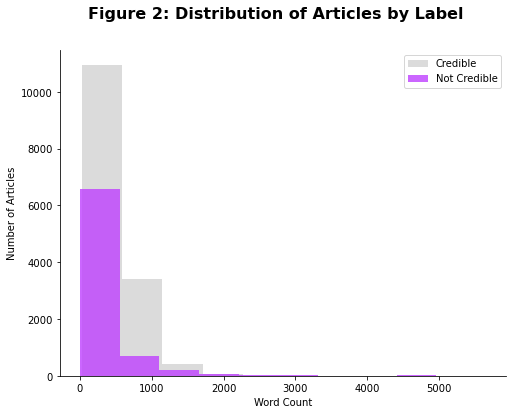

In [15]:
# length (count of words)/distribution of lyrics per genre
from nltk.tokenize import RegexpTokenizer
from collections import Counter

LABEL = ['Credible', 'Not Credible']
tokenizer = RegexpTokenizer(r'\w+')
COLORS = ['lightgray', '#bf40ff']
for news, color in zip(LABEL, COLORS):
    df[df.Label
          == news].Content.apply(lambda x:
                                 len(tokenizer.tokenize(x))).hist(label=news,
                                                                  color=color,
                                                                  figsize=(
                                                                      8, 6),
                                                                  alpha=0.8)

plt.legend()
plt.grid(b=None)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Word Count')
ax.set_ylabel('Number of Articles')
plt.suptitle('Figure 2: Distribution of Articles by Label',
             fontweight='bold',
             fontsize=16)
plt.show()

Based on Figure 2, the articles in our dataset have roughly the same length whether tagged as credible or not.

### C. Topic Mining

The TFIDF Vectorizer was used to turn each article into a Bag of Words (BoW) table. The BoWs were then clustered using the KMeans algorithm. For dimensionality reduction, truncated singular value decomposition was used due to the nature of sparse nature of BoW tables. The truncated BoWs were then plotted into clusters.

### Full Dataset

In [6]:
data = Preprocess(df_)

100%|██████████| 22458/22458 [00:45<00:00, 498.51it/s]


In [17]:
df_bow_wc = data.tfidf.copy()

In [18]:
res_mean = cluster_range(df_bow_wc.to_numpy(),
                         KMeans(random_state=0),
                         2, 20)

100%|██████████| 19/19 [9:20:30<00:00, 1770.02s/it]  


In [19]:
svd = TruncatedSVD(n_components=2, random_state=1337)
X_new = svd.fit_transform(df_bow_wc.to_numpy())

In [20]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 3: Internal Validation Scores
                </h3>'''))

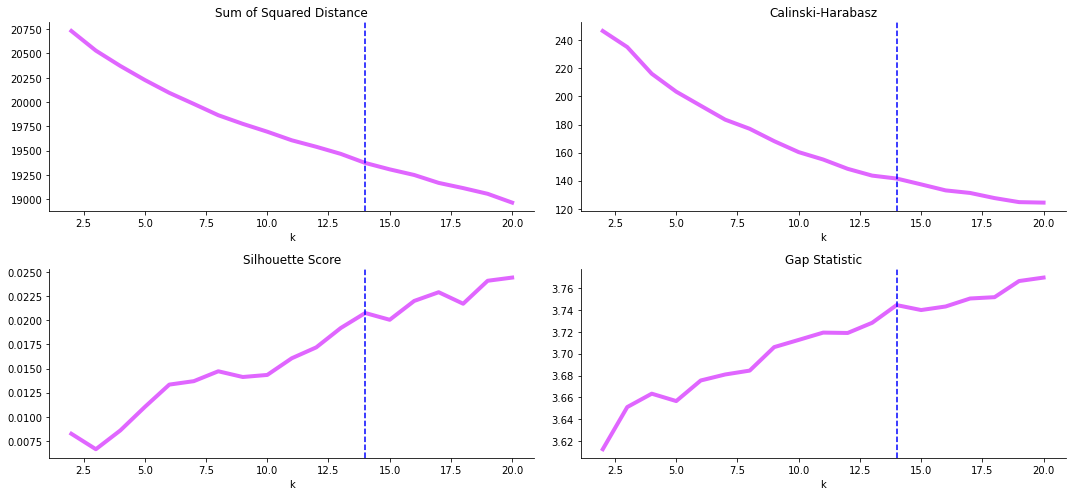

In [21]:
plot_internal(19, res_mean['inertias'], res_mean['chs'],
              res_mean['scs'], res_mean['gss'], 14)

In Figure 3, the internal validation plot for the clustering of the entire dataset shows that the elbow lies at around 14 clusters. Each of these clusters are visualized using word clouds in Figure 4.

In [ ]:
### plt.rcParams["figure.figsize"] = (8, 5)
df_rk_cl, y = clusters(df_bow_wc, 14)
# cl_count = pd.Series(y).value_counts(ascending=True)
# cl_count.plot.barh(color='#E066FF')
# plt.ylabel('Cluster')
# plt.xlabel('Number of songs')
# plt.show()

In [24]:
lsa_dct = lsa(y, df_rk_cl)

100%|██████████| 14/14 [02:43<00:00, 11.70s/it]


In [52]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 4: Word Clouds
                </h3>'''))

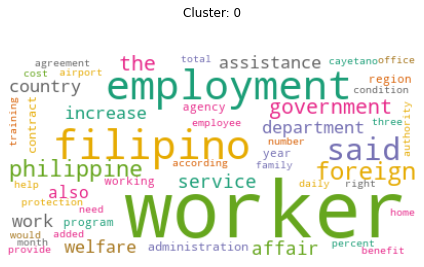

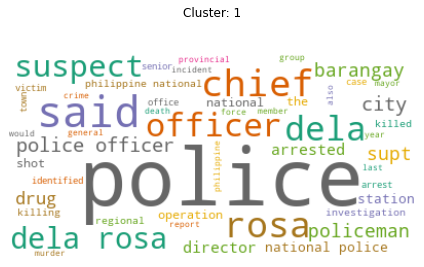

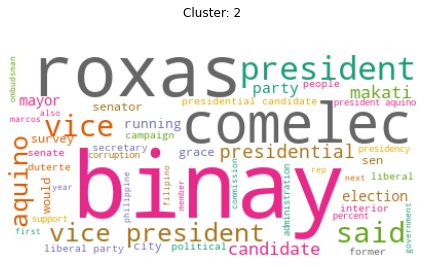

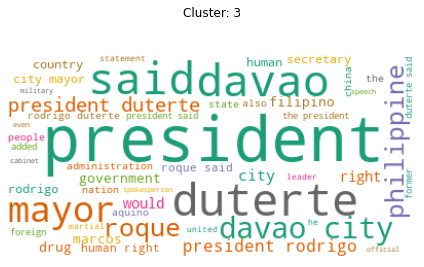

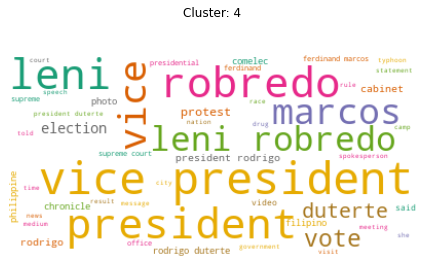

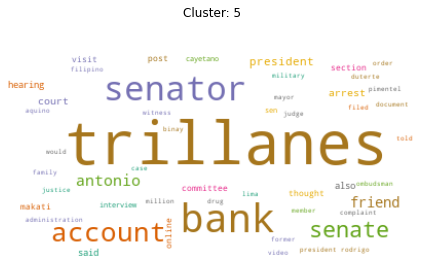

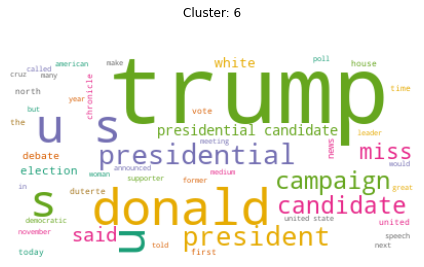

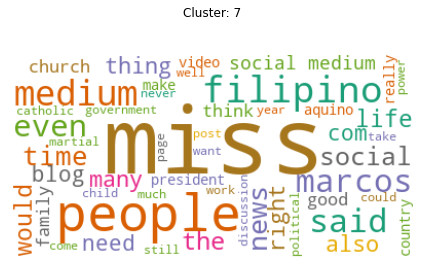

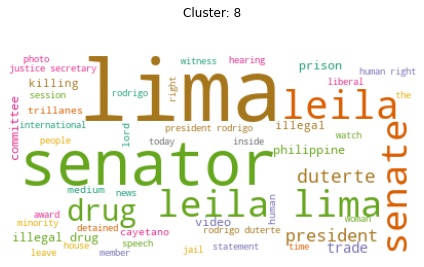

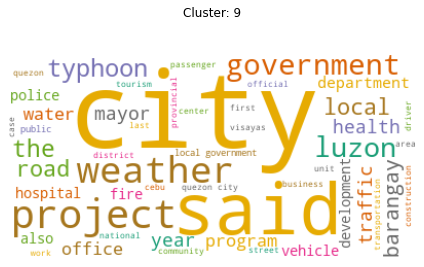

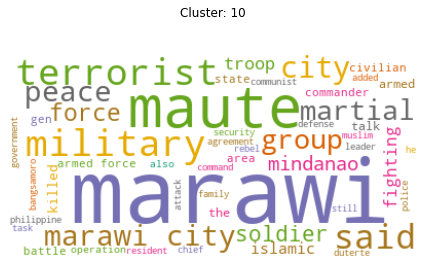

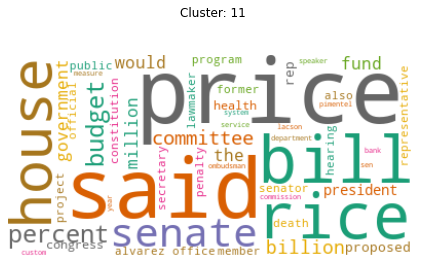

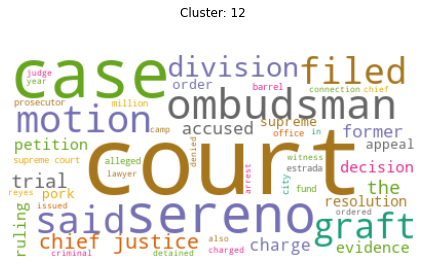

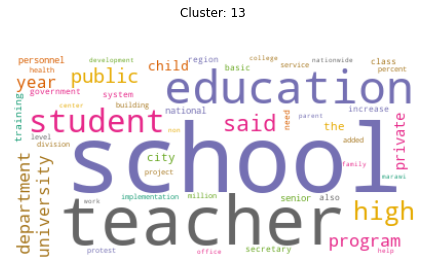

In [26]:
lsa_word_cloud(lsa_dct, df_rk_cl)

The top 6 clusters have shown that, the news articles do cover topics of national interest like government projects, legislation and statistics. Specific events within 2016-18 were also captured including the national elections, the Marawi seige and the case against Chief Justice Sereno.

### Not credible news

The same clustering technique above was done to the protion of the dataset tagged as not credible. 

In [45]:
data = Preprocess(df_[df_.Label==1])

100%|██████████| 7655/7655 [00:12<00:00, 636.06it/s]


In [46]:
df_bow_wc = data.tfidf.copy()

In [47]:
res_mean = cluster_range(df_bow_wc.to_numpy(),
                         KMeans(random_state=0),
                         2, 20)

100%|██████████| 19/19 [3:09:10<00:00, 597.38s/it]  


In [48]:
svd = TruncatedSVD(n_components=2, random_state=1337)
X_new = svd.fit_transform(df_bow_wc.to_numpy())

In [53]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 5: Internal Validation Scores
                </h3>'''))

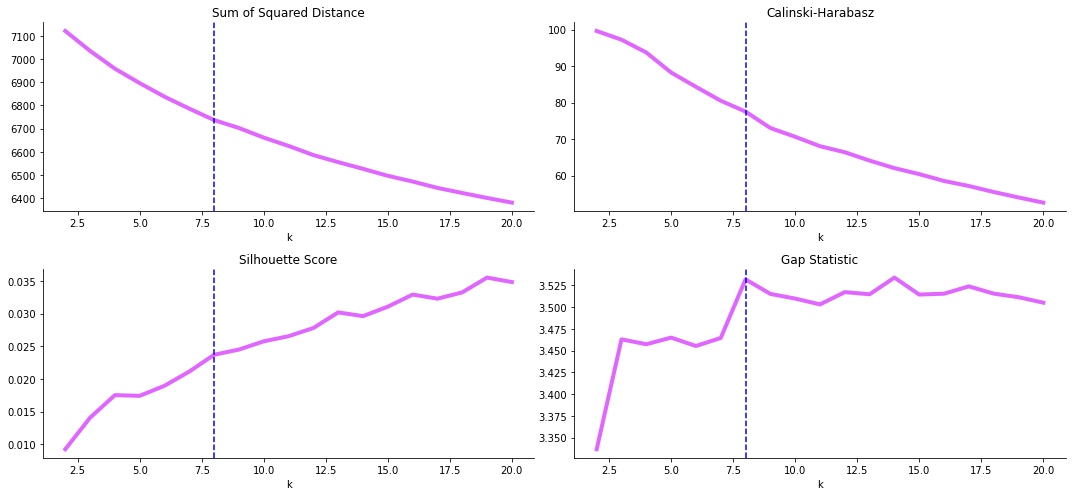

In [55]:
plot_internal(19, res_mean['inertias'], res_mean['chs'],
              res_mean['scs'], res_mean['gss'], 8)

In Figure 5, the internal validation plot for the clustering of the entire dataset shows that the elbow lies at around 8 clusters. Each of this clusters are visualized using word clouds in Figure 6.

In [57]:
### plt.rcParams["figure.figsize"] = (8, 5)
df_rk_cl, y = clusters(df_bow_wc, 8)
# cl_count = pd.Series(y).value_counts(ascending=True)
# cl_count.plot.barh(color='#E066FF')
# plt.ylabel('Cluster')
# plt.xlabel('Number of articles')
# plt.show()

In [58]:
lsa_dct = lsa(y, df_rk_cl)

100%|██████████| 8/8 [00:59<00:00,  7.47s/it]


In [59]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 6: Word Clouds
                </h3>'''))

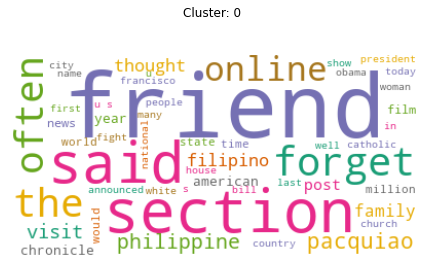

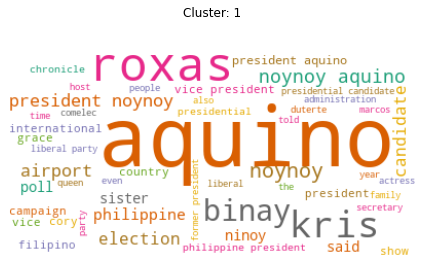

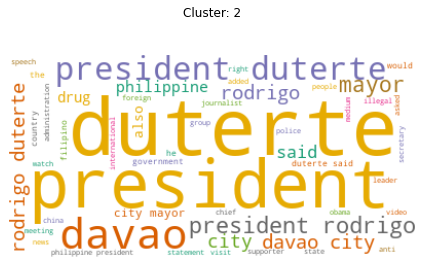

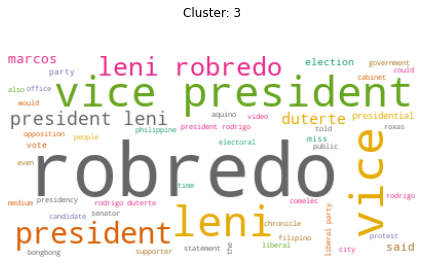

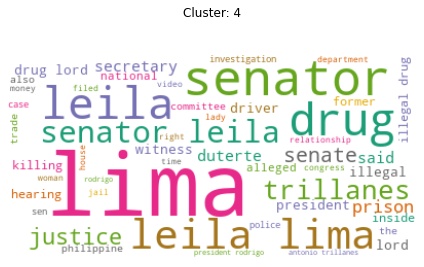

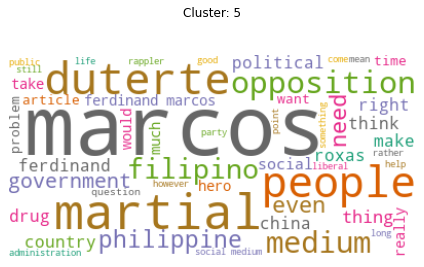

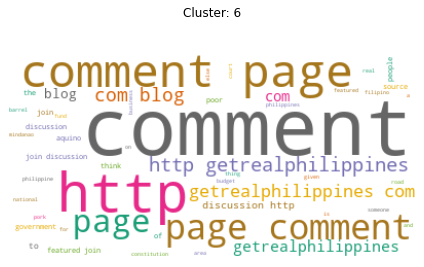

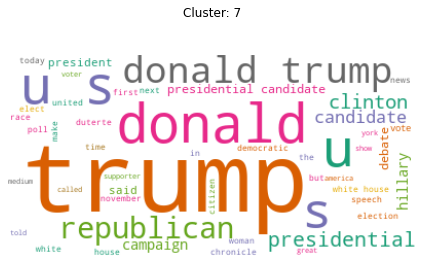

In [60]:
lsa_word_cloud(lsa_dct, df_rk_cl)

Based on the word clouds in Figure 6, the news articles that are considered not credible mostly cover personalities. Unlike Figure 5, the topics here revolve around politicians such as Duterte, Pacquiao, Marcos, Robredo and de Lima.

## D. Data Preparation

Text processing was implemented on the contents of the article to ensure that the created bag-of-words tables would be fit for analysis.

In [13]:
df['Label'] = df['Label'].replace({'Credible': 0, 'Not Credible': 1})
news_headlines = lemmatize(remove_stopwords(tokenize(df['Headline'])))

In [65]:
# 6 mins run
news_articles = lemmatize(remove_stopwords(tokenize(df['Content'])))

In [66]:
display(HTML(f'''<h3 style="text-align:center">
                Table 2: Sample of cleaned data
                </h3>'''))

In [10]:
# df_clean = pd.DataFrame({'headline': news_headlines, 'content': news_articles,
#                          'label': df['Label']})
# df_clean.to_csv('ph_news.csv')
df_clean = pd.read_csv('ph_news.csv', index_col=0)
df_clean

headline  \
0      ph ranks nd asia pacific death household pollu...   
1      aguirre pcso chief deny plotting kill atong ...   
2                duterte say charge vs ex president fail   
3                   group warn bfar law enforcement fund   
4                      solon ask duterte jet ski panatag   
...                                                  ...   
22453       philippine election vote duterte vote aquino   
22454                    family affect flood receive aid   
22455  singer jim parede miff t invite duterte  ina...   
22456                pope francis scolds president obama   
22457  united airlines offer economy minus  seat ha...   

                                                 content  label  
0      pollution cause traditional cooking fuel kill ...      0  
1      justice secretary vitaliano aguirre nd philipp...      0  
2      president rodrigo duterte monday night describ...      0  
3      militant fisher folk group national strength m...      0  
4      magtalo rep gary alejano willing lead charge p...      0  
...                                                  ...    ...  
22453  everybody shock shocked year  presidential el...      1  
22454  total individual family region luzon wer affec...      0  
22455  shortly rod duterte announce joint inauguratio...      1  
22456  president barack obama meet time pope francis ...      1  
22457  half airfare united airlines ual start offer e...      1  

[22458 rows x 3 columns]

In [11]:
#df_clean=df_clean.dropna()
df_clean.isna().sum()

headline    3
content     0
label       0
dtype: int64

## Modelling

To enable our model to perform well on unseen data, we applied Stratified K-Fold cross validation. It is a technique that splits the dataset into train and test data into equal proportions for credible and non-credible news sources. It helps validate the strength of your model on new data by using each fold as a validation set.

We then implemented resampling on the selected model, we were able to represent the classes in the data more equally and reduce the bias towards credible articles. SMOTE or synthetic minority oversampling technique is a resampling method that helps you manage imbalanced data by creating synthetic samples by interpolating between two neighboring points from the minority class.

Using machine learning models, we were able to accurately classify the article as either ‘credible’ or ‘not credible’ by using each token's respective TF-IDF scores. We used over 15 machine learning models to classify news sources. Grid search enables us to find the optimal hyperparameters that allow our model to achieve its best performance. 

Stochastic Gradient Descent held the best accuracy and F1-Score compared to others. We used the F1 Score to make sure that real news wouldnt be wrongfully tagged as non-credible because that would undermine the validity of the model. Compared to a baseline of 69% if we randomly classified our data, our model clearly beats this with a F1 score of 92%.

In [ ]:
X = df_clean['content']
y = df_clean['label']

models_dict = {('LinearSVC', LinearSVC(penalty='l2', max_iter=100000)):
               {'LinearSVC__C': [1e-8, 1e-4, 1e-2, 1, 10, 100]},
               ('Nonlinear SVC', SVC(kernel='sigmoid')):
               {'Nonlinear SVC__C': [1e-8, 1e-4, 1e-2, 1, 10, 100]},
               ('SGDClassifier - L1', SGDClassifier(penalty='l1')): 
               {'SGDClassifier - L1__alpha': [1e-6, 1e-4, 1e-2, 0.1, 1, 10]},
               ('SGDClassifier - L2', SGDClassifier(penalty='l2')): 
               {'SGDClassifier - L2__alpha': [1e-6, 1e-4, 1e-2, 0.1, 1, 10]},
               ('LogisticRegression - L1',
                 LogisticRegression(penalty='l1', solver='saga',
                                    max_iter=100000)):
               {'LogisticRegression - L1__C': [1e-8, 1e-4, 1e-2, 1, 10, 100]},
               ('LogisticRegression - L2',
                 LogisticRegression(penalty='l2', max_iter=100000)):
               {'LogisticRegression - L2__C': [1e-8, 1e-4, 1e-2, 1, 10, 100]},
               ('Perceptron - L1', Perceptron(penalty='l1', n_jobs=-1)):
               {'Perceptron - L1__alpha': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]},
               ('Perceptron - L2', Perceptron(penalty='l2', n_jobs=-1)):
               {'Perceptron - L2__alpha': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]},
               ('DecisionTreeClassifier', DecisionTreeClassifier()):
               {'DecisionTreeClassifier__max_depth': [13, 15, 17, 19, 21, 23]},
               ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1)):
               {'ExtraTreesClassifier__max_depth': [50, 55, 60, 65, 70]},
               ('AdaboostClassifier', 
                AdaBoostClassifier(base_estimator=SGDClassifier(),
                                   n_estimators=100,
                                   algorithm='SAMME')):
               {'AdaboostClassifier__learning_rate': [1e-6, 1e-4, 1e-2, 1]},
               ('BaggingClassifier', BaggingClassifier(n_jobs=-1)):
               {'BaggingClassifier__max_features': [0.3, 0.4, 0.5, 0.6]},
               ('RandomForestClassifier', RandomForestClassifier(n_jobs=-1)):
               {'RandomForestClassifier__max_depth': [100, 102, 104, 
                                                      106, 108, 110]},
               ('GradientBoostingClassifier', GradientBoostingClassifier()):
               {'GradientBoostingClassifier__max_depth': [3, 5, 7, 
                                                          9, 11, 13]},
               ('Three-Layer Neural Network',
                MLPClassifier(solver='adam', max_iter=1000)):
                {'Three-Layer Neural Network__activation': ['tanh', 'logistic'],
                 'Three-Layer Neural Network__alpha': [1e-8, 1e-6, 1e-4, 
                                                       1e-2, 1, 10]}
              }

scores_list = ['accuracy', 'f1']    
train_f1_scores = []
test_f1_scores = []
train_accuracy_scores = []
test_accuracy_scores = []
opt_params = []
train_time = []

skf = StratifiedKFold(n_splits=3, shuffle=False)
               
for model, params in tqdm(models_dict.items()):
               
    vectorizer = ('vectorizer', 
                  TfidfVectorizer(stop_words='english',
                                  token_pattern='[a-zA-Z]{3,}',
                                  min_df=0.001, max_df=0.7))
    resampler = ('smote', SMOTE(n_jobs=-1))

    # build pipeline
    pipeline = Pipeline([vectorizer, resampler, model])

    cv = GridSearchCV(estimator=pipeline, param_grid=params, cv=skf,
                      scoring=scores_list, refit='f1', n_jobs=-1, 
                      return_train_score=True).fit(X, y)
    res = pd.DataFrame(cv.cv_results_)
    res = res.loc[cv.best_index_]

    # store results
    train_accuracy_scores.append(res['mean_train_accuracy'])
    test_accuracy_scores.append(res['mean_test_accuracy'])
    train_f1_scores.append(res['mean_train_f1'])
    test_f1_scores.append(res['mean_test_f1'])
    opt_params.append(res['params'])
    train_time.append(res['mean_fit_time'] + res['mean_score_time'])

In [ ]:
models_list = [item[0] for item in list(models_dict.keys())]
iter_train_time = []
accuracy_score_train = []
accuracy_score_test = []
f1_score_train = []
f1_score_test = []

for train_idx, test_idx in tqdm(skf.split(X, y)):
    
    start_time = time.time()
    
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    vectorizer = TfidfVectorizer(stop_words='english', min_df=0.01, max_df=0.7,
                                 sublinear_tf=True)
    X_train_vec = vectorizer.fit_transform(X_train).toarray()
    X_test_vec = vectorizer.transform(X_test).toarray()
    
    # implement Gaussian Naive-Bayes classifier
    gnb = GaussianNB().fit(X_train_vec, y_train)
    y_pred_train = gnb.predict(X_train_vec)
    y_pred_test = gnb.predict(X_test_vec)

    accuracy_score_train.append(accuracy_score(y_train, y_pred_train))
    accuracy_score_test.append(accuracy_score(y_test, y_pred_test))

    f1_score_train.append(f1_score(y_train, y_pred_train))
    f1_score_test.append(f1_score(y_test, y_pred_test))
    iter_train_time.append(time.time() - start_time)

models_list.append('GaussianNB')
train_accuracy_scores.append(np.mean(accuracy_score_train))
test_accuracy_scores.append(np.mean(accuracy_score_test))
train_f1_scores.append(np.mean(f1_score_train))
test_f1_scores.append(np.mean(f1_score_test))
opt_params.append('NA')
train_time.append(np.mean(iter_train_time))

In [ ]:
display(HTML(f'''<h3 style="text-align:center">
                Table 3: Grid Search of Optimal Hyperparameters
                </h3>'''))

In [ ]:
model_metrics = pd.DataFrame({'Models': models_list,
                              'Train Acc': train_accuracy_scores,
                              'Test Acc': test_accuracy_scores,
                              'Train F1-Score': train_f1_scores,
                              'Test F1-Score': test_f1_scores,
                              'Optimal Hyperparameter': opt_params,
                              'Run Time': train_time})
model_metrics

In [13]:
# can access the results through this pickle file
model_metrics = pd.read_pickle('fake_news_classifier_results.pkl')
model_metrics

Models  Train Acc  Test Acc  Train F1-Score  \
0                    LinearSVC   0.994033  0.938730        0.991251   
1                Nonlinear SVC   0.961484  0.936815        0.943955   
2           SGDClassifier - L1   0.948059  0.929513        0.924501   
3           SGDClassifier - L2   0.970768  0.940110        0.957369   
4      LogisticRegression - L1   0.998842  0.930537        0.998301   
5      LogisticRegression - L2   0.992341  0.940155        0.988772   
6              Perceptron - L1   0.996749  0.925105        0.995225   
7              Perceptron - L2   0.997328  0.923813        0.996080   
8       DecisionTreeClassifier   0.943739  0.823715        0.919657   
9         ExtraTreesClassifier   0.996594  0.922433        0.995028   
10          AdaboostClassifier   0.996482  0.927108        0.994852   
11           BaggingClassifier   0.997774  0.893624        0.996729   
12      RandomForestClassifier   0.999844  0.922166        0.999771   
13  GradientBoostingClassifier   0.999866  0.925105        0.999804   
14  Three-Layer Neural Network   1.000000  0.936370        1.000000   
15                  GaussianNB   0.877482  0.868510        0.831195   

    Test F1-Score                             Optimal Hyperparameter  \
0        0.910170                                {'LinearSVC__C': 1}   
1        0.907859                            {'Nonlinear SVC__C': 1}   
2        0.897417              {'SGDClassifier - L1__alpha': 0.0001}   
3        0.912382              {'SGDClassifier - L2__alpha': 0.0001}   
4        0.898580                 {'LogisticRegression - L1__C': 10}   
5        0.912382                 {'LogisticRegression - L2__C': 10}   
6        0.888921                  {'Perceptron - L1__alpha': 1e-10}   
7        0.887491                  {'Perceptron - L2__alpha': 1e-07}   
8        0.753825          {'DecisionTreeClassifier__max_depth': 23}   
9        0.884259            {'ExtraTreesClassifier__max_depth': 65}   
10       0.892710           {'AdaboostClassifier__learning_rate': 1}   
11       0.836523           {'BaggingClassifier__max_features': 0.4}   
12       0.883553         {'RandomForestClassifier__max_depth': 104}   
13       0.890892      {'GradientBoostingClassifier__max_depth': 11}   
14       0.905918  {'Three-Layer Neural Network__activation': 'lo...   
15       0.817187                                                 NA   

      Run Time  
0     7.886342  
1   223.723626  
2     6.051627  
3     5.905114  
4   388.035512  
5     6.900118  
6     5.925090  
7     5.825233  
8    17.518729  
9    54.392524  
10   16.361852  
11  128.813419  
12   57.392466  
13  437.323598  
14  193.098298  
15    6.193777

## Results and Discussion

Lastly, our use of interpretability methods such as SHAP and LIME that would allow the insights from our results to be more digestible to the public. Model interpretability is no longer a ‘good to have’. It is now a necessity in order to share insights while preventing readers from misconstruing results which can just fuel even more misinformation.

###  A. Global
To interpret the model, we used Latent Semantic Analysis to group words together into topics and interpreted each topic to produce a topic name. We then implemented SHAP which interpreted how certain topics would contribute a positive SHAP score (red towards the right) which would mean that an article is not credible. So clusters featuring Politicians, International Events, and even mentions of former Senator Trillanes (also a Personality) would be more likely tagged as not credible. 

On the other hand certain topics would contribute a negative SHAP score (red towards the left) which would mean that an article is credible. So clusters featuring Police Activities and the current Administration (institutions) or the Marawi Siege (a national event) would be more likely tagged as credible.

It is better to use Latent Semantic Analysis to produce topics rather than relying on individual tokens for the global explainability of the model. However, interpretation of topics still relies on human input or domain expertise.

In [14]:
X = df_clean['content']
y = df_clean['label']

In [15]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, random_state=42)

vectorizer1 = TfidfVectorizer(stop_words='english', max_df=0.7, min_df=0.01)
X_train_vec1 = vectorizer1.fit_transform(X_train1)

svd = TruncatedSVD(n_components=100, random_state=42)
X_train_svd = svd.fit_transform(X_train_vec1)
X_test_vec1 = vectorizer1.transform(X_test1)

X_test_svd = svd.transform(X_test_vec1)

ada1 = SMOTE(n_jobs=-1, random_state=42)
X_train_res1, y_train_res1 = ada1.fit_resample(X_train_svd, y_train1)

vocab1 = vectorizer1.get_feature_names()

model1 = SGDClassifier(max_iter=1e7, alpha=0.0001, n_jobs=-1, random_state=42)
model1.fit(X_train_res1, y_train_res1)

y_pred1 = model1.predict(X_test_svd)
print('f1:', f1_score(y_pred1, y_test1))

f1: 0.8716969118115251


In [16]:
explainer1 = shap.LinearExplainer(model1, shap.maskers.Independent(data=X_train_svd))
shap_values1 = explainer1(X_train_svd)

In [17]:
display(HTML(f'''<h3 style="text-align:center">
                Table 4: Word Clusters as Topics
                </h3>'''))

In [18]:
for topic_idx, topic in enumerate(svd.components_[:52]):
    message = "Topic #%d: " % topic_idx
    message += ", ".join([vocab1[i] for i in topic.argsort()[:-10 -1:-1]])
    print(message)

Topic #0: duterte, president, drug, government, city, people, police, year, aquino, law
Topic #1: drug, police, pnp, suspect, kill, arrest, illegal, operation, chief, rosa
Topic #2: duterte, drug, president, lima, mr, robredo, senator, trillane, killing, vice
Topic #3: court, justice, case, supreme, sereno, file, ombudsman, senate, binay, senator
Topic #4: marawi, military, peace, martial, marcos, mindanao, city, terrorist, milf, group
Topic #5: police, poe, trump, election, roxas, candidate, robredo, marcos, binay, comelec
Topic #6: percent, drug, robredo, binay, roxas, poe, vice, mayor, survey, election
Topic #7: trump, president, donald, presidential, candidate, duterte, binay, republican, percent, election
Topic #8: city, mayor, trillane, duterte, davao, binay, bank, account, ombudsman, post
Topic #9: robredo, marcos, court, duterte, leni, city, trump, vice, supreme, president
Topic #10: aquino, china, robredo, president, philippine, pnp, philippines, miss, saf, police
Topic #11: p

In [19]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 7: Top 10 Topic Features
                </h3>'''))

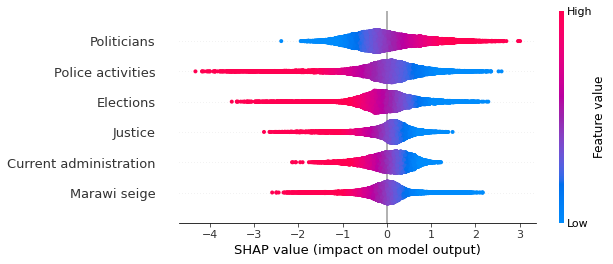

In [20]:
fnames=(['Current administration','Police activities', 'Politicians', 
        'Justice', 'Marawi seige', 'i','International events','Elections',
       'Trillanes']+ ['i']*20 + ['Catholic church'] + ['i']*20
        + ['Senate inquiries']+ ['i'])
shap.summary_plot(shap_values1, max_display=6,feature_names=fnames)

### B. Local

For local explainability, SHAP’s property of assigning marginal contributions aligns with the simplest form of semantic analysis, wherein each token contributes (by simple addition) to the overall classification of the document. It is possible to produce this using SHAP’s force plot and printing text in the color of its contribution accordingly. SHAP’s text plots do this automatically although it is reserved for advanced NLP models. However, LIME’s Text Explainer can do this with simpler models such as the one chosen.

### SHAP

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english',
                                  token_pattern='[a-zA-Z]{3,}',
                                  min_df=0.001, max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)

ada = SMOTE(n_jobs=-1, random_state=42)
X_train_vec_res, y_train_res = ada.fit_resample(X_train_vec, y_train)

X_test_vec = vectorizer.transform(X_test)
vocab = vectorizer.get_feature_names()


model = SGDClassifier(max_iter=1e7, alpha=0.0001, n_jobs=-1, random_state=42
                     ,loss='log')
model.fit(X_train_vec_res, y_train_res)

y_pred = model.predict(X_test_vec)

In [23]:
explainer = shap.LinearExplainer(model, shap.maskers.Independent(data=X_train_vec.toarray()))
shap_values = explainer(X_train_vec.toarray())

In [24]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 8: SHAP Force Plot
                </h3>'''))

u vice presidential candidate alaska governor sarah palin today call philippine president elect rodrigo duterte copycat palin react read statement duterate go sell presidential yatcht convert presidential chopper air ambulance duterterte give credit original idea palin say acceptance speech republican national convention palin say governor  jetplane acquire predecessor auction ebay say believe plane thing taxpayer pay plane ebay sale  purchase site plane eventually sell aircraft broker businessman larry reynolds ask price original cost palin rumor preshumptive republican presidential nominee donald trump  pick vice presidential running mate trump hand refer duterterte west 


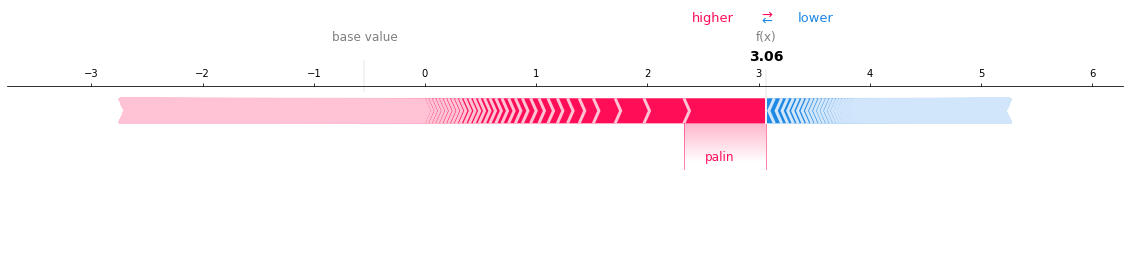

In [25]:
shpvs = shap_values[1].values
print_shap_contrib(X_train.loc[13829], shpvs, vocab)
shap.force_plot(explainer.expected_value, shpvs, vocab, matplotlib=True)

From the visualization above, terms that refer to specific individual personalities such as Palin, Trump, and Duterte tend to be indicators that a news source may not be credible. With this insight, articles that talk about popular people such as politicians must be fact-checked and verified across different sources. 

### LIME

LIME gives us  the probability of how credible or not credible a particular news article would be based on the content of its words. Words highlighted in a darker blue would correspond to a higher credibility probability and words highlighted in a darker orange would correspond to a higher not credible probability.

Using our dataset with articles from 2016 to 2018, we compared the probability that an individual article would be flagged as not credible using words and their probabilities would correspond to their classification as credible or non credible.

In [26]:
pipe = make_pipeline(vectorizer, model)

In [27]:
### Explainer Set up
explainer_lime = LimeTextExplainer(class_names=['Credible', 'Not Credible'])

In [28]:
### Get the features
max_features = df_clean.content.str.split().map(lambda x: len(x)).max()
max_features

3018

In [40]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 9: Lime Text Analysis on Pope Francis Scolds President Obama Article
                </h3>'''))

In [39]:
df_clean.iloc[22456]

headline                  pope francis scolds president obama
content     president barack obama meet time pope francis ...
label                                                       1
Name: 22456, dtype: object

In [37]:
### Local Interpretability, let's use 22457 entry
exp = explainer_lime.explain_instance(df_clean.content.iloc[22456],
                                     pipe.predict_proba, num_features=max_features)

# figure = exp.as_pyplot_figure()  <<< optional

article = exp.show_in_notebook(text=True)
article

LIME has determined that the article above focuses on attacking certain personalities such as Pope Francis and President Obama, which is a common trait found in news articles leading to the article being classified as 88% not credible.

### More recent cases

Using our model which we learned from older news articles, let’s see how our model stands with current news articles. We can see how the model flagged an article about a personality as not credible while it tagged a current event as credible.

In [31]:
display(HTML(f'''<h3 style="text-align:center">
                Table 5: Sample of Latest News
                </h3>'''))

In [32]:
### Using other file >>>> Latest news csv

latest = pd.read_csv('Latest News.csv',encoding="ISO-8859-1")
latest.head(5)

Source  Label  \
0                                                NaN    1.0   
1                                                NaN    1.0   
2                                                NaN    1.0   
3                                                NaN    1.0   
4  https://newsinfo.inquirer.net/1520596/ilocos-s...    0.0   

                                             Content  
0  The Philippines's Commission's Elections (COME...  
1  He Shed Tears When He Accepted The Nomination ...  
2  NEVER MIND THAT SHE IS A U.S. citizen. RAPPLER...  
3  Vice President and 2022 Presidential Aspirant ...  
4  Ilocos Sur Has Eased Its Border Protocols for ...

In [33]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 10: LIME Text Analysis on Pharmally Article
                </h3>'''))

In [34]:
# real news on covid similar to not credible
news1 = explainer_lime.explain_instance(latest.Content.iloc[8],
                                     pipe.predict_proba, num_features=max_features)
text1 = news1.show_in_notebook(text=True)
text1

The above article reflects institutions such as Committees and Offices which is a common trait found in credible news sources leading to its  87% classification as credible.

In [35]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 11: LIME Text Analysis on VP Robredo's Drug Test Article
                </h3>'''))

In [36]:
news2 = explainer_lime.explain_instance(latest.Content.iloc[3],
                                     pipe.predict_proba, num_features=max_features)
text2 = news2.show_in_notebook(text=True)
text2

The above article focuses on political personalities such as Leni Robredo and Rodrigo Duterte leasing to it being tagged as 96% not credible.

## Conclusion

Bantay Balita aims to be a demonstration in using machine learning as an impartial and data-driven tool to classify and understand misinformation. We cannot simply tag from the source because in today’s day and age, creating a new information source (whether credible or not) is quick and easy to do.

From our study, we have learned how real news tends to talk about institutions, policies, and current events, while fake news tends to focus on  attacking personalities and sensationalizing current events, so we must consider everything we read with a grain of salt.

We must do our part as citizens of this nation to be informed. With data-driven guidance from machine learning tools, we may all further strive to be knowledgeable citizens who aim to think critically for a better nation tomorrow.

### References

Fernandez, A.C. (2019). "Computing the Linguistic-Based Cues of Credible and Not Credible News in the
Philippines Towards Fake News Detection". Mapua Institute of Technology